In [41]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"D:\Data analysis\My Project\Weather dataset\1. Weather Data.csv")


In [2]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [3]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [4]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [5]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [6]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [7]:
df['Date/Time']=df['Date/Time'].astype('datetime64[ns]')
df.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

In [8]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [9]:
#  Find all the unique 'Wind Speed' values in the data.

unique_Wind_Speed=df['Wind Speed_km/h'].unique()
unique_Wind_Speed

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [10]:
# Find the number of times when the 'Weather is exactly Clear'

Weather_Clear=[]

for i in df['Weather'].unique():
    c=0
    for j in df['Weather']:
        if j==i:
            c+=1
    Weather_Clear.append([i,c])
    
Weather_Clear=pd.DataFrame(Weather_Clear,columns=['weather','count'])
Weather_Clear.head()

,weather,count
0,Fog,150
1,"Freezing Drizzle,Fog",6
2,Mostly Cloudy,2069
3,Cloudy,1728
4,Rain,306


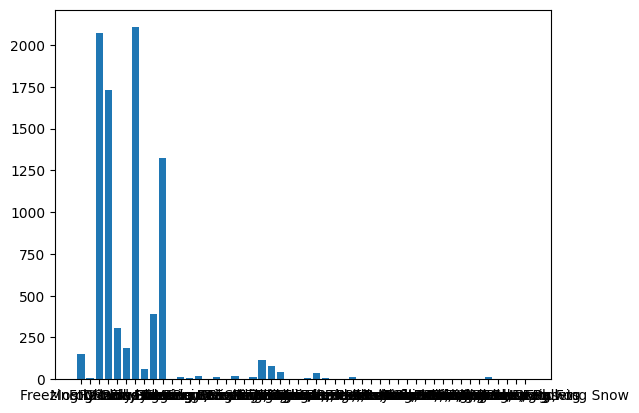

<Figure size 1000x1000 with 0 Axes>

In [48]:
plt.bar(Weather_Clear['weather'],Weather_Clear['count'])
plt.figure(figsize=(10,10))
plt.show()

In [11]:
# method 1

Weather_Clear[(Weather_Clear.weather =='Clear')]

,weather,count
9,Clear,1326


In [12]:
# method 2

Weather_Clear.query('weather == "Clear"')

,weather,count
9,Clear,1326


In [13]:
# method 3

Weather_Clear.loc[(Weather_Clear['weather']=='Clear')]

,weather,count
9,Clear,1326


In [14]:
# Find the number of times when the 'Wind Speed was exactly 4 km/h'.

Wind_Speed=[]

for i in unique_Wind_Speed:
    c=0
    for j in df['Wind Speed_km/h']:
        if i==j:
            c+=1
    Wind_Speed.append([i,c])
Wind_Speed=pd.DataFrame(Wind_Speed,columns=['wind_speeds','count'])
Wind_Speed.head()

,wind_speeds,count
0,4,474
1,7,677
2,6,609
3,9,830
4,15,719


In [15]:
Wind_Speed[(Wind_Speed.wind_speeds== 4)]

,wind_speeds,count
0,4,474


In [16]:
# Find out all the Null Values in the data.

df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [17]:
# Rename the column name 'Weather' of the dataframe to 'Weather Condition'.
df.rename(columns={'Weather':'Weather Condition'},inplace=True)
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [18]:
# What is the mean 'Visibility' ?
Visibility=round(df['Visibility_km'].mean(),2)
print("mean 'Visibility :",Visibility)

mean 'Visibility : 27.66


In [19]:
# What is the Standard Deviation of 'Pressure'  in this data?
Pressure_std=round(df['Press_kPa'].std(),2)
print("Standard Deviation of 'Pressure:",Pressure_std)

Standard Deviation of 'Pressure: 0.84


In [20]:
# What is the Variance of 'Relative Humidity' in this data ?
Rel_Hum_var=round(df['Rel Hum_%'].var(),2)
print("Relative Humidity var:",Rel_Hum_var)

Relative Humidity var: 286.25


In [21]:
#  Find all instances when 'Snow' was recorded.
df['Weather Condition'].value_counts()

Weather Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [22]:
# method 2
df[df['Weather Condition']=='Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [23]:
# Method 3 str.contain
df[df['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [24]:
# Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.

df[(df['Wind Speed_km/h'] >24) & (df['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,2012-12-28 17:00:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,2012-12-30 17:00:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,2012-12-30 23:00:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [25]:
# What is the Mean value of each column against each 'Weather Condition ?

Weather_base_mean=df.drop('Date/Time',axis=1)
Weather_base_mean.groupby(['Weather Condition']).mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [26]:
# What is the Minimum & Maximum value of each column against each 'Weather Condition ?

df.groupby('Weather Condition').agg({min,max})


Date/Time  \
                                                        min   
Weather Condition                                             
Clear                                   2012-01-03 19:00:00   
Cloudy                                  2012-01-01 17:00:00   
Drizzle                                 2012-01-23 21:00:00   
Drizzle,Fog                             2012-01-23 20:00:00   
Drizzle,Ice Pellets,Fog                 2012-12-17 09:00:00   
Drizzle,Snow                            2012-12-17 15:00:00   
Drizzle,Snow,Fog                        2012-12-18 21:00:00   
Fog                                     2012-01-01 00:00:00   
Freezing Drizzle                        2012-01-07 11:00:00   
Freezing Drizzle,Fog                    2012-01-01 02:00:00   
Freezing Drizzle,Haze                   2012-02-01 11:00:00   
Freezing Drizzle,Snow                   2012-01-13 03:00:00   
Freezing Fog                            2012-01-22 06:00:00   
Freezing Rain                           2012-01-07 10:00:00   
Freezing Rain,Fog                       2012-01-07 09:00:00   
Freezing Rain,Haze                      2012-02-01 14:00:00   
Freezing Rain,Ice Pellets,Fog           2012-12-17 03:00:00   
Freezing Rain,Snow Grains               2012-01-13 09:00:00   
Haze                                    2012-01-22 12:00:00   
Mainly Clear                            2012-01-02 12:00:00   
Moderate Rain,Fog                       2012-12-10 08:00:00   
Moderate Snow                           2012-01-12 15:00:00   
Moderate Snow,Blowing Snow              2012-12-27 10:00:00   
Mostly Cloudy                           2012-01-01 16:00:00   
Rain                                    2012-01-01 18:00:00   
Rain Showers                            2012-01-01 22:00:00   
Rain Showers,Fog                        2012-10-20 03:00:00   
Rain Showers,Snow Showers               2012-11-04 08:00:00   
Rain,Fog                                2012-01-23 18:00:00   
Rain,Haze                               2012-03-13 07:00:00   
Rain,Ice Pellets                        2012-12-18 05:00:00   
Rain,Snow                               2012-01-10 05:00:00   
Rain,Snow Grains                        2012-12-21 00:00:00   
Rain,Snow,Fog                           2012-12-08 21:00:00   
Rain,Snow,Ice Pellets                   2012-12-21 01:00:00   
Snow                                    2012-01-03 07:00:00   
Snow Pellets                            2012-11-24 15:00:00   
Snow Showers                            2012-01-02 17:00:00   
Snow Showers,Fog                        2012-12-26 09:00:00   
Snow,Blowing Snow                       2012-01-13 21:00:00   
Snow,Fog                                2012-02-10 23:00:00   
Snow,Haze                               2012-02-01 17:00:00   
Snow,Ice Pellets                        2012-03-03 04:00:00   
Thunderstorms                           2012-07-04 16:00:00   
Thunderstorms,Heavy Rain Showers        2012-05-29 06:00:00   
Thunderstorms,Moderate Rain Showers,Fog 2012-07-17 06:00:00   
Thunderstorms,Rain                      2012-05-25 20:00:00   
Thunderstorms,Rain Showers              2012-05-29 04:00:00   
Thunderstorms,Rain Showers,Fog          2012-06-29 03:00:00   
Thunderstorms,Rain,Fog                  2012-07-17 05:00:00   

                                                            Temp_C        \
                                                        max    min   max   
Weather Condition                                                          
Clear                                   2012-12-30 20:00:00  -23.3  32.8   
Cloudy                                  2012-12-31 06:00:00  -21.4  30.5   
Drizzle                                 2012-12-22 01:00:00    1.1  18.8   
Drizzle,Fog                             2012-12-19 10:00:00    0.0  19.9   
Drizzle,Ice Pellets,Fog                 2012-12-17 09:00:00    0.4   0.4   
Drizzle,Snow                            2012-12-19 18:00:00    0.9   1.2   
Drizzle,Snow,Fog          

In [27]:
# Show all the Records where Weather Condition is Fog.
df[df['Weather Condition']=="Fog"]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog


In [39]:
# Find all instances when 'Weather is Clear' or 'Visibility is above 40'.
df[(df['Weather Condition'] =='Clear') | (df['Visibility_km'] > 40)]


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


In [40]:
# Q. 15) Find all instances when : A. 'Weather is Clear' and 'Relative Humidity is greater than 50' or B. 'Visibility is above 40'

df[(df['Weather Condition'] =='Clear') & (df['Rel Hum_%'] > 50) | (df['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,2012-01-05 14:00:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear
